<a href="https://colab.research.google.com/github/Droslj/scATAC-seq-complete-/blob/Google-colab/scATAC_seq_(1)_episcanpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

scATAC seq, based on scATAC seq processing Galaxy tutorials (scATAC preprocessing (2), Standard scATAC seq processing pipeline (1) )
AD Objects created in Galaxy using customized Galaxy WF with Snapatac2 and imported
(1) https://usegalaxy.eu/training-material/topics/single-cell/tutorials/scatac-preprocessing-tenx/tutorial.html#mapping-reads-to-a-reference-genome, (2) https://usegalaxy.eu/training-material/topics/single-cell/tutorials/scatac-standard-processing-snapatac2/tutorial.html
Data taken from the following NCBI study:
Metabolic adaptation pilots the differentiation of human hematopoietic cells (https://www.ncbi.nlm.nih.gov/bioproject/PRJNA1015713)
Import Anndata objects for two biological replicates, SRR26046013 (cells treated with AOA inhibitor) and SRR26046019 (untreated cells)
Perform following steps:
(1) Import matrices
(2) Compute fragment size distribution
(3) Compute TSS enrichment
(4) Filter cell counts based on TSSe
(5) Create cell by bin matrix based on 500 bp wide bins accross the whole genome
(6) Perform feature selection
(7) Perform Doublet removal
(8) Perform Dim reduction (spectral)
(9) Perform Clustering (neighborhood, UMAP, leiden)
(10) Create a cell by gene matrix
(11) Concatenate matrices using Inner join
(12) Remove batch effects

In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab

In [ ]:
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!conda --version

conda 23.11.0


In [ ]:
!which conda

/usr/local/bin/conda


In [ ]:
!conda config --add channels conda-forge

In [ ]:
!conda config --add channels bioconda

In [1]:
!pip install episcanpy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 MB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.1/183.1 kB 618.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.3 MB/s eta 0:00:00


In [2]:
import episcanpy as epi

In [3]:
!pip install snapatac2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.2/687.2 kB 25.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 131.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the foll

In [4]:
!pip show snapatac2

Name: snapatac2
Version: 2.8.0
Summary: SnapATAC2: Single-cell epigenomics analysis pipeline
Home-page: https://github.com/
Author: Kai Zhang <kai@kzhang.org>
Author-email: Kai Zhang <zhangkai33@westlake.edu.cn>
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: anndata, igraph, kaleido, macs3, multiprocess, natsort, numpy, pandas, plotly, polars, pooch, pyarrow, pyfaidx, rustworkx, scikit-learn, scipy, tqdm, typeguard
Required-by: 


In [5]:
import snapatac2 as snap

In [6]:
!pip install umap-learn -q



In [7]:
import umap.umap_ as umap


In [8]:
from umap import UMAP

In [9]:
!pip install scanpy -q

In [10]:
import scanpy as sc

In [11]:
pip show scanpy

Name: scanpy
Version: 1.10.4
Summary: Single-Cell Analysis in Python.
Home-page: https://scanpy.org
Author: Alex Wolf, Philipp Angerer, Fidel Ramirez, Isaac Virshup, Sergei Rybakov, Gokcen Eraslan, Tom White, Malte Luecken, Davide Cittaro, Tobias Callies, Marius Lange, Andrés R. Muñoz-Rojas
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: anndata, h5py, joblib, legacy-api-wrap, matplotlib, natsort, networkx, numba, numpy, packaging, pandas, patsy, pynndescent, scikit-learn, scipy, seaborn, session-info, statsmodels, tqdm, umap-learn
Required-by: episcanpy


In [12]:
!pip install leidenalg -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.2 MB/s eta 0:00:00


In [13]:
import numpy as np

In [14]:
import anndata as ad

In [15]:
import matplotlib.pyplot as plt

In [16]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Import reads from google drive (CBP matrix)

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
adata = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/peak_matrix.h5ad')

In [20]:
adata

AnnData object with n_obs × n_vars = 10210 × 200379
    obs: 'n_fragment', 'frac_dup', 'frac_mito'

# Quality Control
Perform quality control to filter out low-quality cells and peaks.

In [22]:
epi.pp.filter_cells(adata, min_counts=1000)
epi.pp.filter_features(adata, min_cells=10)


# Normalization and Dimensionality Reduction
Normalize your data and perform dimensionality reduction.

In [23]:
epi.pp.normalize_total(adata)
epi.pp.log1p(adata)
sc.tl.pca(adata)

In [25]:
adata

AnnData object with n_obs × n_vars = 7157 × 200062
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'n_counts'
    var: 'n_cells'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

# Clustering and Visualization
Cluster your cells and visualize the resultss

In [26]:
sc.pp.neighbors(adata)

In [27]:
adata

AnnData object with n_obs × n_vars = 7157 × 200062
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'n_counts'
    var: 'n_cells'
    uns: 'log1p', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [28]:
sc.tl.umap(adata)

In [29]:
adata

AnnData object with n_obs × n_vars = 7157 × 200062
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'n_counts'
    var: 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [30]:
sc.tl.leiden(adata)


 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.


In [31]:
adata

AnnData object with n_obs × n_vars = 7157 × 200062
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'n_counts', 'leiden'
    var: 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

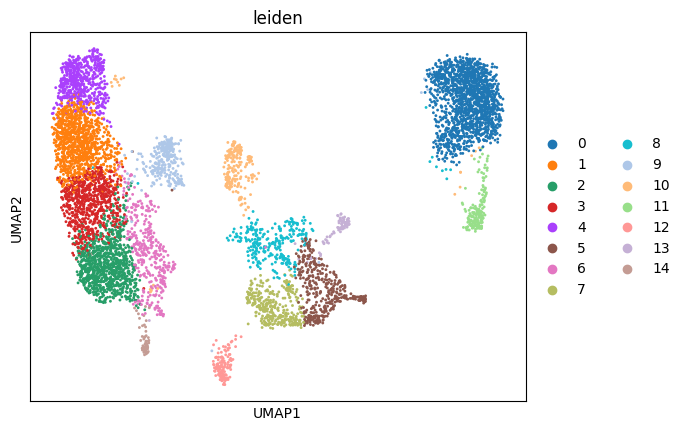

In [32]:
sc.pl.umap(adata, color=['leiden'])

# Peak Annotation and Motif Analysis
Annotate peaks and perform motif analysis.

In [ ]:
gtf_file=

In [36]:
!pip install gffutils -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 12.7 MB/s eta 0:00:00


In [55]:
import gzip
import tempfile
import shutil
import episcanpy as epi

def find_genes_from_gzipped_gtf(adata, gtf_file, key_added='genes', upstream=2000, downstream=0,
                                 feature_type='gene', annotation='gene_name', raw=False):
    """
    Handles gzipped GTF files by creating a temporary unzipped copy.
    Calls the original `epi.tl.find_genes` with the temporary file path.
    Handles lines with variable number of fields and detects the delimiter.
    """
    with tempfile.NamedTemporaryFile(suffix=".gff3", delete=False) as tmp:
        with gzip.open(gtf_file, 'rb') as f_in:
            with open(tmp.name, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

        # Attempt to detect delimiter (tab or space)
        with open(tmp.name, 'r') as f:
            first_line = f.readline()
            delimiter = '\t' if '\t' in first_line else ' '

        epi.tl.find_genes(adata, gtf_file=tmp.name, key_added=key_added, upstream=upstream,
                          downstream=downstream, feature_type=feature_type,
                          annotation=annotation, raw=raw,
                          # Pass delimiter argument
                          delimiter=delimiter)

In [56]:
adata

AnnData object with n_obs × n_vars = 7157 × 200062
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'n_counts', 'leiden'
    var: 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [58]:
epi.pp.motif_enrichment(adata)

AttributeError: module 'episcanpy.preprocessing' has no attribute 'motif_enrichment'